<a href="https://colab.research.google.com/github/Minalva/python-for-DATA-LOVE/blob/main/Copy_of_HW_11_3_%D0%A1%D1%82%D0%B0%D1%82%D0%B8%D1%81%D1%82%D0%B8%D1%87%D0%BD%D1%96_%D0%B2%D1%96%D0%B7%D1%83%D0%B0%D0%BB%D1%96%D0%B7%D0%B0%D1%86%D1%96%D1%97_%D0%B7_Seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнє завдання: Статистичні візуалізації з Seaborn

## Опис завдання
У цьому домашньому завданні ви будете використовувати бібліотеку Seaborn для створення красивих статистичних візуалізацій. Seaborn має кращий стандартний стиль та спеціалізується на статистичних графіках.

**Опис колонок:**
- `datetime` - дата та час
- `season` - квартал (1-Q1, 2-Q2, 3-Q3, 4-Q4)
- `holiday` - чи є день святковим (0=ні, 1=так)
- `workingday` - чи є день робочим (0=ні, 1=так)
- `weather` - погодні умови (1=ясно, 2=туман, 3=легкий дощ, 4=сильний дощ)
- `temp` - температура в градусах Цельсія
- `atemp` - як відчувається температура
- `humidity` - вологість (%)
- `windspeed` - швидкість вітру
- `casual` - кількість випадкових користувачів
- `registered` - кількість зареєстрованих користувачів
- `count` - загальна кількість орендованих велосипедів

## Підготовка даних

---
🌱 Коментар щодо сезонності

Колонка season у датасеті представляє саме квартали року, а не метеорологічні сезони. Тому всі аналізи сезонності ви можете будувати на основі кварталів.

Водночас дані були зібрані в Індії, де поділ на сезони інший, ніж у Європі чи США. Якщо ви хочете дослідити сезонність відповідно до індійської системи сезонів, можна створити окрему колонку.

Справжні сезони в Індії:

| Сезон        | Місяці                     |
| ------------ | -------------------------- |
| Winter       | December–February (12,1,2) |
| Summer       | March–May (3,4,5)          |
| Monsoon      | June–September (6,7,8,9)   |
| Post-monsoon | October–November (10,11)   |


Тоді потрібно зробити нову колонку weather_season_india, мапнувши місяці так:

12, 1, 2 → 1 (Winter)

3, 4, 5 → 2 (Summer)

6–9 → 3 (Monsoon)

10–11 → 4 (Post-Monsoon)

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Завантаження даних
df = pd.read_csv('/content/sample_data/yulu_rental.csv')
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)

# Встановлюємо стиль seaborn
sns.set_theme(style="whitegrid")

# Додамо додаткові колонки для аналізу
df['date'] = df.index.date
df['day'] = df.index.day
df['week'] = df.index.isocalendar().week
df['weekday_num'] = df.index.weekday
df['weekday'] = df.index.day_name()
df['year'] = df.index.year
df['month'] = df.index.month
df['hour'] = df.index.hour

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive



---

## Завдання 1: Лінійний графік з довірчими інтервалами

**Завдання:**
Побудуйте лінійний графік середньої кількості оренд помісячно з довірчими інтервалами (confidence intervals) рівними 1 стандартному відхиленню.

**УВАГА!** В лекції ми будували подібний графік, але там були дані по номеру місяця, а тут треба зобразити дані в розрізі місяць_рік.

В якості підказки вам наведений код для створення колонки, яка містить `місяць_рік`. Як її використати - вже питання до вас :)

Очікуваний результат:
![](https://drive.google.com/uc?id=1uVKqfY1VlhVMaM3wu99uVGT1f7S0Vf8S)

**Питання для інтерпретації:**
- В які місяці найбільша невизначеність в даних?

In [16]:
df['month_year'] = df.index.to_period('M')
df['month_year']  = df.month_year.astype(str)

/tmp/ipython-input-53733709.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(data=df, x='month_year', y='count', ci='sd')


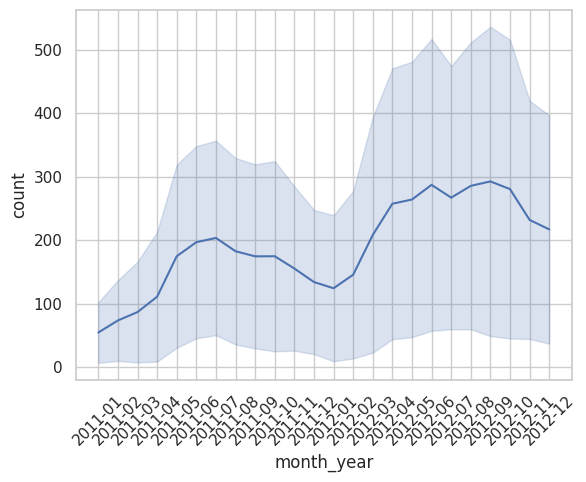

In [17]:
sns.lineplot(data=df, x='month_year', y='count', ci='sd')
sns.set_style('whitegrid')
plt.xticks(rotation=45)
plt.show()

## Завдання 2: Порівняння стилів - Pandas vs Seaborn гістограма

**Завдання:**
Побудуйте гістограму розподілу температури двома способами - з Pandas та Seaborn - та порівняйте візуальний вигляд. Задайте однакову кількість бінів в цих візуалізаціях, відмінну від стандартної. В візуалізації Seaborn додайте параметр при побудові `kde=True`.

**Функція Seaborn: `sns.histplot()`**

Можна побудувати окремо два графіки. Але для тих, хто хоче складніше - побудуйте ці 2 графіки на 1 фігурі.

**Дайте відповідь на питання:**
1. Яка візуальна різниця між Pandas та Seaborn гістограмами?
2. Що за лінія додаткова на графіку в Seaborn? Як вона називається і як ви б її описали своїми словами?

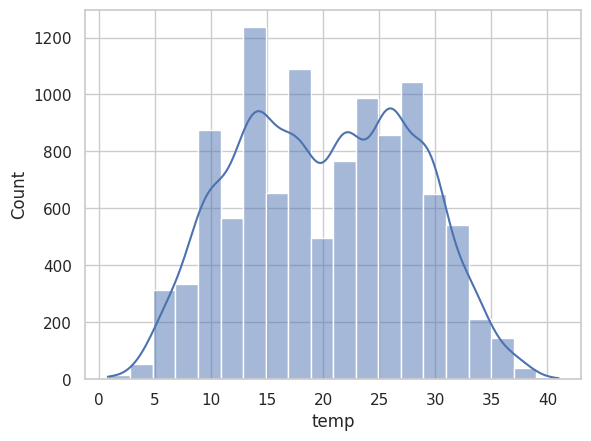

In [18]:
sns.histplot(data=df, x='temp', bins=20, kde=True)
plt.show()

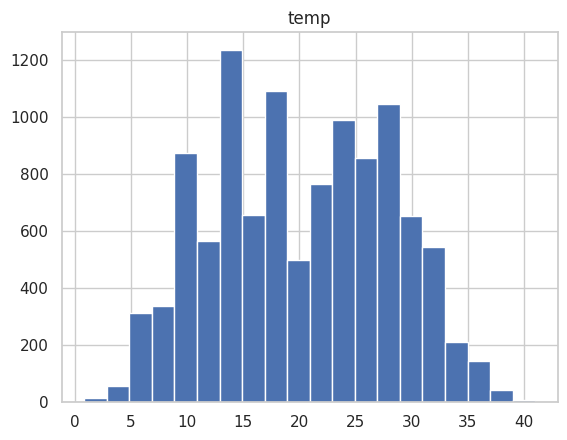

In [25]:
pd.DataFrame(df['temp']).hist(bins=20)
plt.show()

## Завдання 3: Box Plot порівняння - Pandas vs Seaborn

**Завдання:**
Побудуйте box plot для кількості погодинних оренд велосипедів за погодними умовами з Pandas та Seaborn.

**Функція Seaborn: `sns.boxplot()`**

Можна побудувати окремо два графіки. Але для тих, хто хоче складніше - побудуйте ці 2 графіки на 1 фігурі.

Просунуте доповнення:
- підпишіть погодні умови їх інтерпретацією з опису даних в обох графіках

**Дайте відповідь на питання:**
- Яка візуальна різниця між Pandas та Seaborn бокс-плотами?

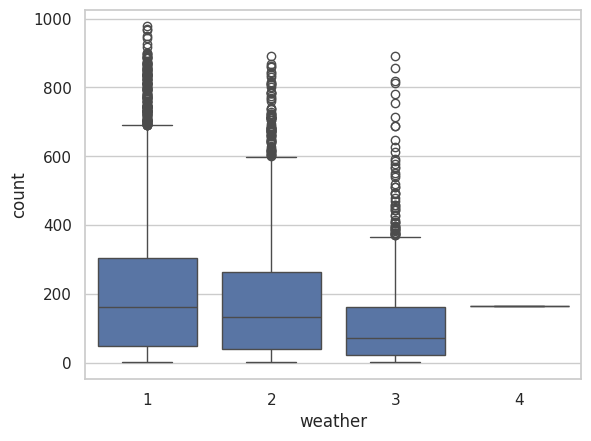

In [26]:
sns.boxplot(data=df, x='weather', y='count')
plt.show()

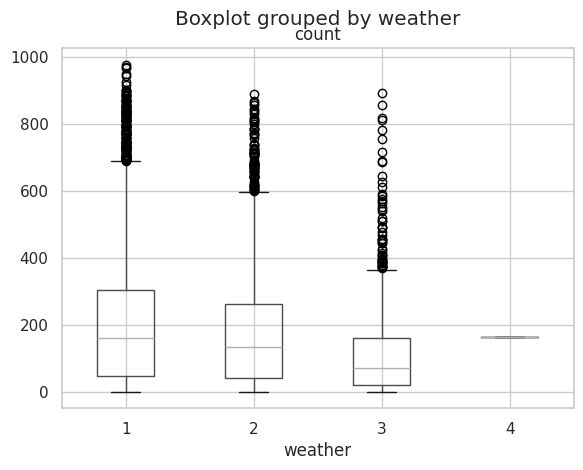

In [29]:
df.boxplot(column='count', by='weather')
plt.show()

<!-- - -->
## Завдання 4: Heatmap кореляційної матриці

**Завдання:**
Створіть із Seaborn кореляційну матрицю з забарвленням heatmap (колір відповідає величині значення в клітинці) числових змінних в наших даних з анотаціями значень.

**Дайте відповіді на питання по графіку:**
1. Які змінні найсильніше корелюють з загальною кількістю оренди (count)?
2. Яка кореляція між temp та atemp? Чому?
3. Які змінні мають негативну кореляцію?


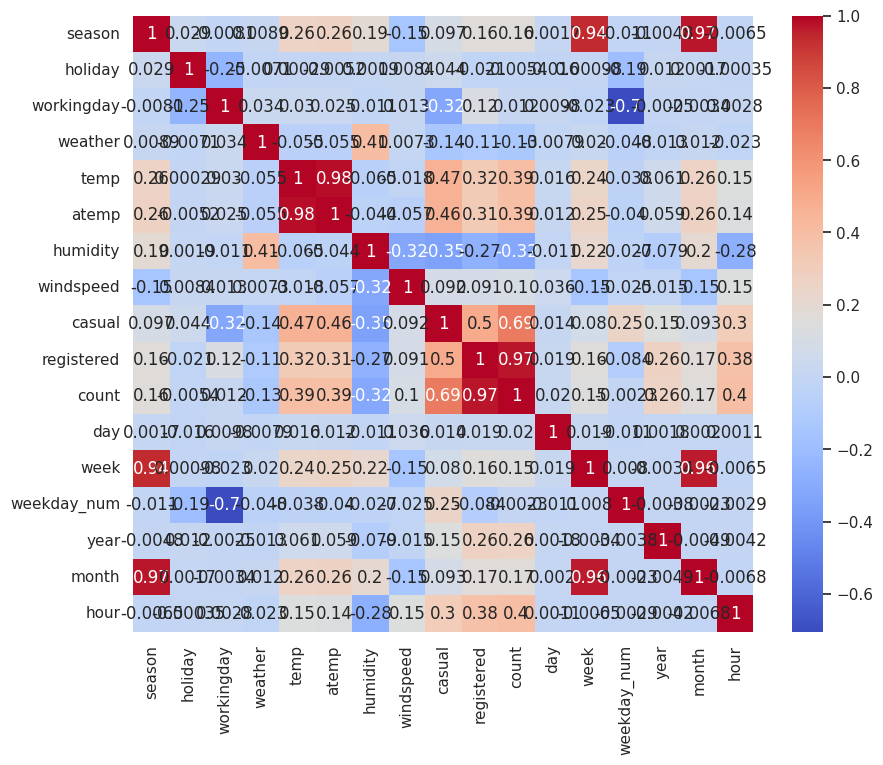

In [43]:
from numpy._core import numeric
plt.figure(figsize=(10, 8))
numeric_df=df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.show()


## Завдання 5: Violin Plot для глибокого аналізу розподілів

**Завдання:**
Створіть violin plot для аналізу розподілу оренди за кварталами.

Дайте відповіді на питання:

**Питання для інтерпретації:**
1. Що показує "товщина" violin plot?
2. В якому кварталі найбільша варіабельність оренди?
3. Яка перевага violin plot над звичайним box plot?


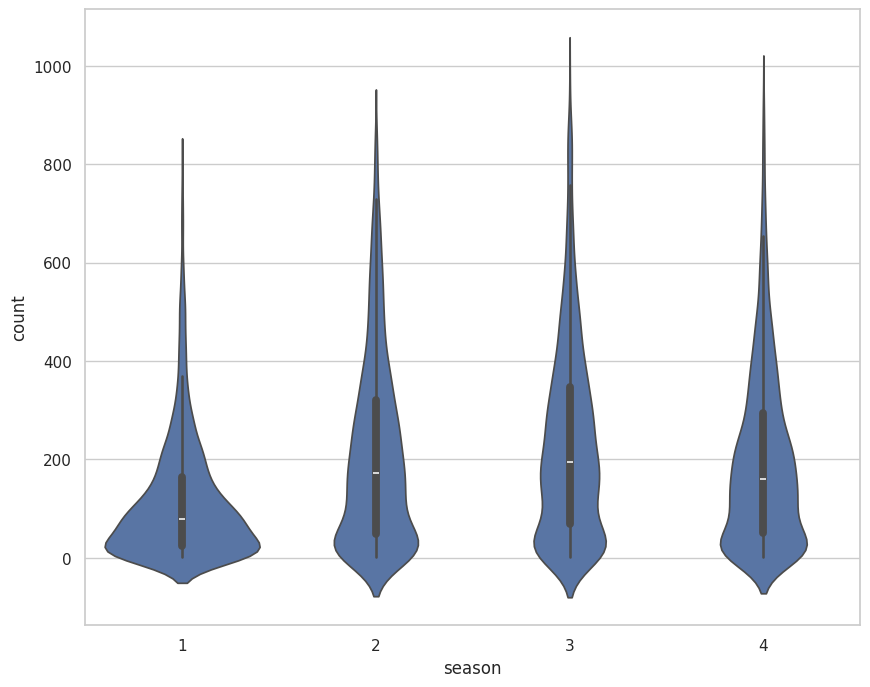

In [44]:
plt.figure(figsize=(10, 8))
sns.violinplot(data=df, x='season', y='count')
plt.show()

## Завдання 6 : Pairplot для мультиваріативного аналізу

**Завдання:**
Створіть pairplot для аналізу взаємозв'язків між ключовими змінними `'temp', 'humidity', 'windspeed', 'count'` . В якості візуальної розбивки за категоріями (параметр `hue`) додайте season (квартал).

Дайте відповіді на питання:

**Питання для інтерпретації:**
1. Між якими змінними спостерігається найсильніший лінійний зв'язок?
2. Яка характеристика найбільше відрізняється між кварталами?

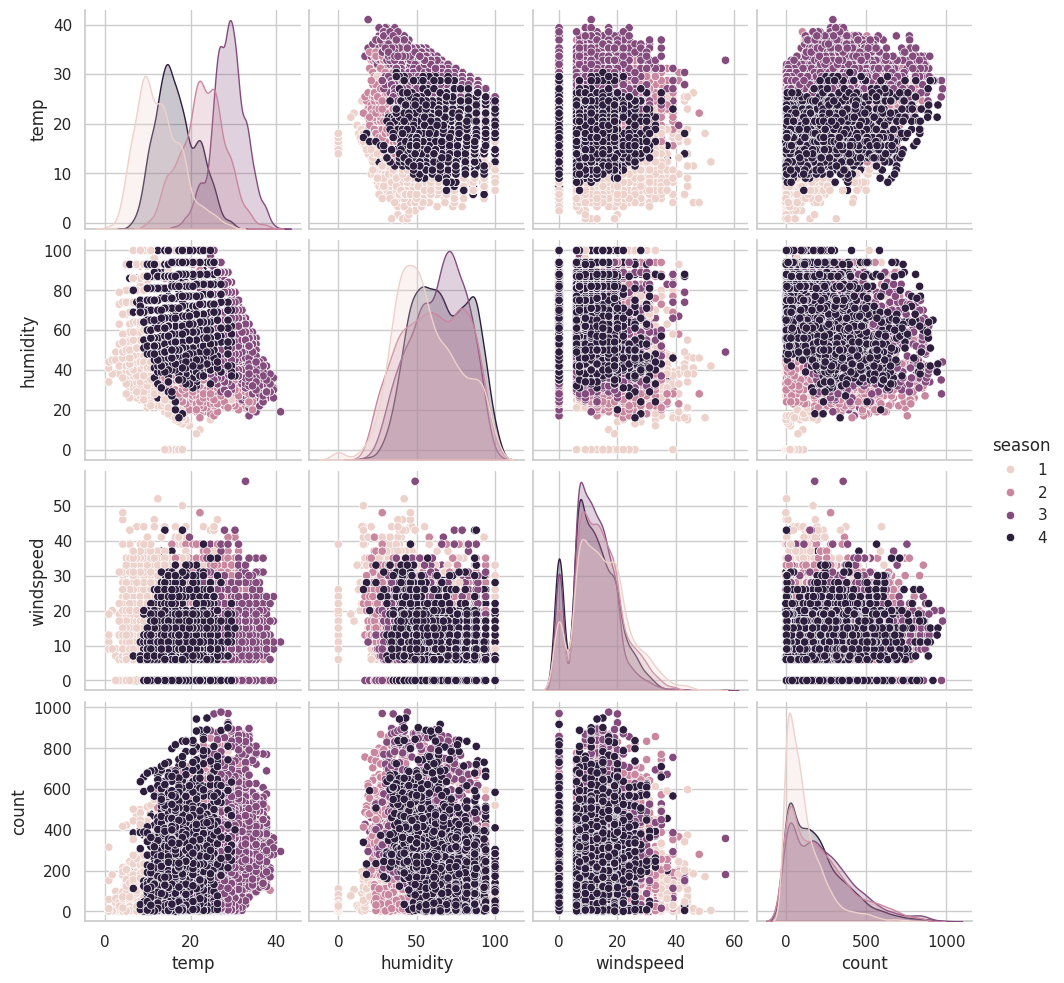

In [45]:

sns.pairplot(data=df, vars=['temp', 'humidity', 'windspeed', 'count'], hue='season')
plt.show()

## Завдання 7: Joint Plot для детального аналізу двох змінних

**Завдання:**
Проаналізуйте залежність між температурою та орендою за допомогою joint plot. В якості візуальної розбивки за категоріями (параметр `hue`) додайте `workingday`.

Дайте відповіді на питання:

**Питання для інтерпретації:**
1. Що показують графіки по краях?
2. Чи є різниця у поведінці користувачів у робочий і неробочий день?

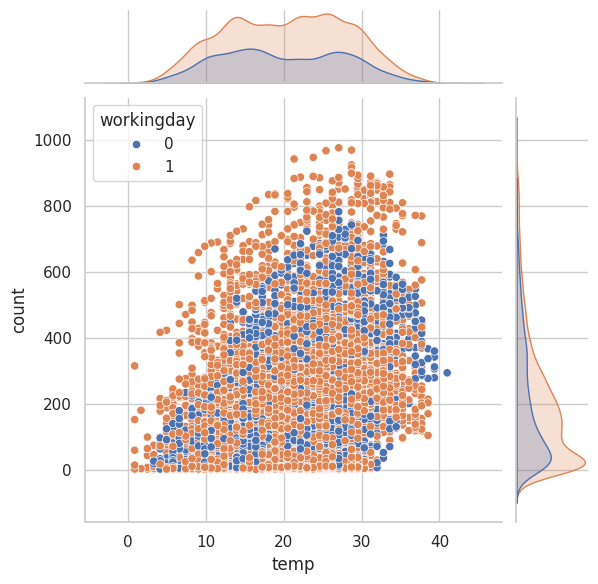

In [46]:
sns.jointplot(data=df, x='temp', y='count', hue='workingday')
plt.show()